## Document Similarity

In [1]:
!pip install nltk

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import text_transformer

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exercise 1:
Plot an histogram of the word vocabulary of “Alice in Wonderland”.
(number of words vs. frequency). (bins of size 1).

In [3]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
alice = "carroll-alice.txt"
sents = nltk.corpus.gutenberg.sents(alice)

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Colect occurrences

In [30]:
flatten = text_transformer.flatten(sents)
size = len(flatten)
ocorrences = text_transformer.count_frequencies(flatten)

print("Tokens",size)
print("Distinct tokens",len(ocorrences))

Tokens 34113
Distinct tokens 3015


__Sort by occurrences__

In [32]:
ocorrences.sort(reverse=True, key=lambda token_count: token_count[1])

print("5 most frequent tokens",ocorrences[0:5])

5 most frequent tokens [(',', 1993), ("'", 1732), ('the', 1527), ('and', 802), ('.', 764)]


#### Make the the plot

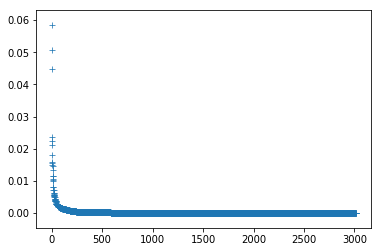

In [33]:
import seaborn as sns

frequencies = [ token_count[1]/size for token_count in ocorrences]
sns.scatterplot(x=range(0,len(ocorrences)), y=frequencies, marker='+')

### Exercise 2: 
Then process the text: normalize, lemmatize, stop word removal, etc..
and plot the histogram again. (use nltk implementation). What happened? Describe
what changed in the frequency distribution of words.

#### Apply processing to tokens and collect occurrences

In [34]:
processed_tokens = text_transformer.normalizer(flatten)
processed_tokens = text_transformer.lemmatizer(processed_tokens) 
processed_ocorrences = text_transformer.count_frequencies(processed_tokens)


print("Tokens",len(processed_tokens))
print("Distinct tokens",len(processed_ocorrences))

Tokens 13946
Distinct tokens 2339


__Sort occurrences__

In [37]:
processed_ocorrences.sort(reverse=True, key=lambda token_count: token_count[1])
print("5 most frequent tokens",processed_ocorrences[0:5])

5 most frequent tokens [('i', 543), ('said', 462), ('alice', 398), ('little', 128), ('the', 115)]


#### Make the plot

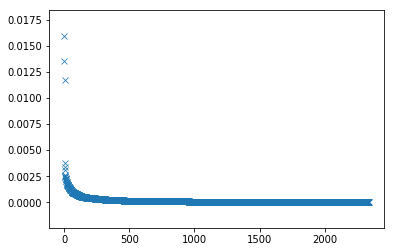

In [14]:
import seaborn as sns

processed_frequencies = [word[1]/size for word in processed_ocorrences]
sns.scatterplot(x=range(0,len(processed_ocorrences)), y=processed_frequencies, marker='x')

### Exercise 3:
Build the term-document matrix for the collection in “books”.Find the most similar document content to the “Alice in Wonderland” using tf-idf and cosine similarity.

In [ ]:
books = ['shakespeare-macbeth.txt',
         'chesterton-ball.txt',
         'melville-moby_dick.txt',
         'austen-sense.txt',
         'carroll-alice.txt']

# inspired by https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

In [ ]:
macbeth = nltk.corpus.gutenberg.sents(books[0])
ball = nltk.corpus.gutenberg.sents(books[1])
moby_dick = nltk.corpus.gutenberg.sents(books[2])
sense = nltk.corpus.gutenberg.sents(books[3])
alice = nltk.corpus.gutenberg.sents(books[4])

In [ ]:
def computeTF (word_dict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in word_dict.items():
        tfDict[word] = count/float(bowCount)
    
    return tfDict

In [ ]:
def bow (text):
    word_dictionary = {}
    for word in text:
        if not word in word_dictionary:
            word_dictionary[word] = 1
        else:
            word_dictionary[word] +=1
    
    return word_dictionary

In [ ]:
def flatten (text):
    return [word for sentence in text for word in sentence]

In [ ]:
def computeIDF (doclist):
    import math
    idfDict = {}
    N = len(doclist)
    idfDict = dict.fromkeys(doclist[0].keys(), 0)
    print("preliminary IDF dict:", idfDict)
    for doc in doclist:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
                print("Word in Dict: {} :".format(word), idfDict[word])
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N/float(val)) 
    
    return idfDict

In [ ]:
ceasar = ["This", "is", "a", "book", "about", "ceasar", "."]
brutus = ["Brutus", "this", "book", "is", "about", "."]
corpus = [bow(ceasar), bow(brutus)]

In [ ]:
corpus[0]

In [ ]:
computeIDF(corpus)

In [ ]:
alice_bow

In [ ]:
alice = flatten(sents)

In [ ]:
import text_transformer as tt
alice = tt.normalizer(alice)

In [ ]:
alice_bow = bow(alice)

In [ ]:
alice_TF = computeTF(alice_bow, alice)

In [ ]:
alice_TF

In [ ]:
trial_text = "Hello"

In [ ]:
punct = "\{}".format("|\\".join(string.punctuation))

In [ ]:
punct

In [ ]:
import re 
if not re.search( r'{} +'.format(punct), trial_text):
    print("Match")
elif re.search( r'{} +'.format(punct), trial_text) == False:
    print("No Match")
else:
    print("You're an idiot")

In [ ]:
r'{}+'.format(punct)